In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(simple_train)

vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [14]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [15]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [16]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [17]:
print(type(simple_train_dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [18]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [19]:
simple_test = ['please dont call me']

In [21]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [22]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [30]:
sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [37]:
sms.groupby('message').describe().head()

label                 
                                                   count unique  top freq
message                                                                  
&lt;#&gt;  in mca. But not conform.                    1      1  ham    1
&lt;#&gt;  mins but i had to stop somewhere first.     1      1  ham    1
&lt;DECIMAL&gt; m but its not a common car here...     1      1  ham    1
and  picking them up from various points               1      1  ham    1
came to look at the flat, seems ok, in his 50s?...     1      1  ham    1

In [38]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [39]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

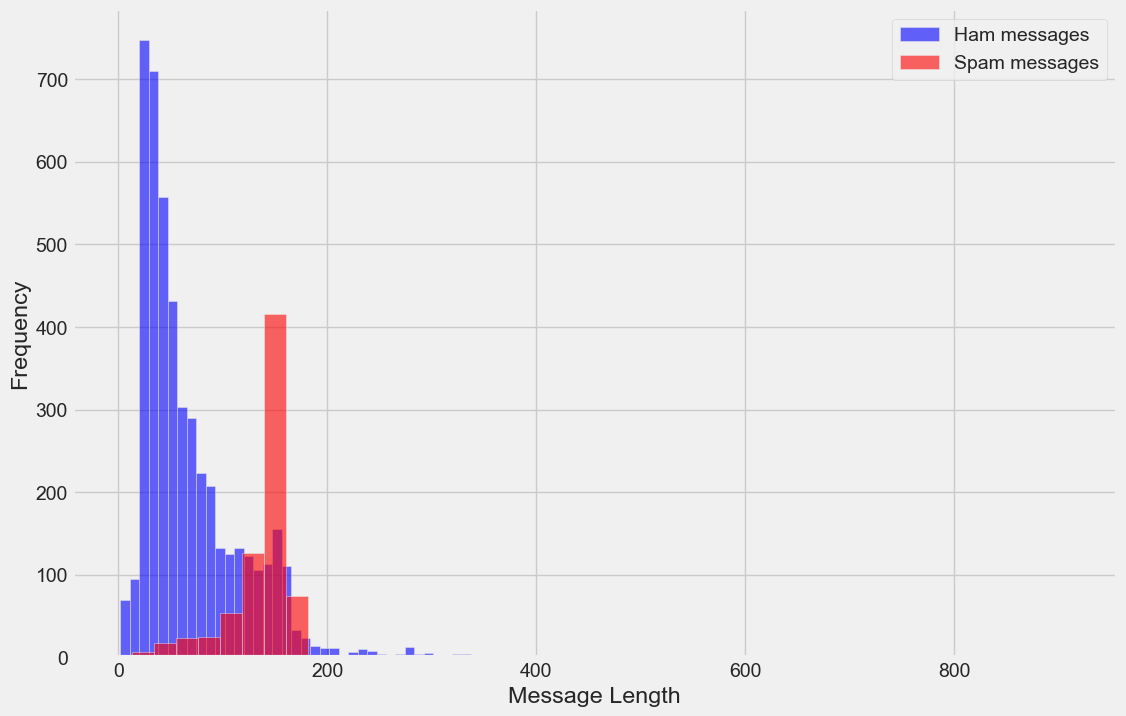

In [47]:
plt.figure(figsize=(12,8))

sms[sms.label=='ham'].message_len.plot(bins=100, kind='hist', color='blue', label='Ham messages', alpha=0.6)

sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel('Message Length')

In [48]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [49]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [52]:
sms[sms.message_len > 900].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [63]:
# processing text into Bag of Words

import string

def text_process(mess):
    # 1. remove all punctuations
    # 2. remove all stopwords
    # 3. return a list of cleaned text in bag of words

    STOPWORDS = stopwords.words('english')
    REMOVEABLE_WORDS = ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    STOPWORDS += REMOVEABLE_WORDS
    nopunc = [c for c in mess if c not in string.punctuation]

    nopunc = ''.join(nopunc)

    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [64]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [66]:
sms['clean_msg'] = sms.message.apply(text_process)

sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [69]:
def split_and_lower(x):
    return [word.lower() for word in x.split()]

In [74]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(split_and_lower)
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common())

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94), ('give', 92), ('say', 91), ('already', 89), ('right', 89), ('make', 88), ('ask', 88), ('said', 86), ('really', 85), ('yeah', 85), ('amp', 82), ('tomorrow', 80), ('phone', 80), ('didnt', 79), ('e', 78), ('morning', 77), ('please', 76), ('cos', 76), ('life', 74), ('ive', 73), 

In [76]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x : [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [98]:
# Vectorization:
# 3 step process to turn the list of spam and non-spam words into a bag-of-words model (vectorized representation)

# 1. count how many times a word appears in each message (i.e. 'term frequency')
# 2. weigh the counts such that frequent tokens get lower weights
# 3. normalize the vectors to unit length to abstract from the original text length (i.e. L2 norm)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = sms.clean_msg
y= sms.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.5, min_df=2)
vect.fit(X_train)

X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)


(5572,)
(5572,)


<4179x6510 sparse matrix of type '<class 'numpy.float64'>'
	with 35457 stored elements in Compressed Sparse Row format>

In [99]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.41 ms, sys: 2.7 ms, total: 8.12 ms
Wall time: 6.73 ms


MultinomialNB()

In [100]:
from sklearn import metrics

y_pred_class = nb.predict(X_test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9849246231155779
=======Confision Matrix===========


array([[1209,    4],
       [  17,  163]])

In [101]:
X_test[(y_pred_class==1) & (y_test==0)]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
759     Call youcarlos isare phones vibrate acting mig...
Name: clean_msg, dtype: object

In [102]:
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
1662    Hi lookin saucy daytime fun wiv busty married ...
5035    wont believe true Incredible Txts Reply G lear...
4247    accordingly repeat text word ok mobile phone send
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
517     credits topped httpwwwbubbletextcom renewal Pi...
3753    Bloomberg Message center 447797706009 wait App...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_ms

In [103]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([1.53496479e-02, 1.97114931e-02, 7.35587933e-05, ...,
       7.71781219e-03, 4.65124419e-04, 9.88794813e-04])

In [104]:
# calculating AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9789731611248511

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========


array([[1213,    0],
       [  46,  134]])

In [106]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

%time logreg.fit(X_train_dtm, y_train)

CPU times: user 8.47 ms, sys: 1.3 ms, total: 9.77 ms
Wall time: 8.16 ms


LogisticRegression(solver='liblinear')

In [107]:
y_pred_class = logreg.predict(X_test_dtm)

y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.0195681 , 0.02039005, 0.11599699, ..., 0.03314328, 0.01308972,
       0.01363516])

In [108]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9834888729361091
=======Confision Matrix===========
[[1213    0]
 [  23  157]]
=======ROC AUC Score===========
0.9850416781166987


CountVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 2), stop_words='english')

In [ ]:
# https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners